# Chap1 决策树

## 1.概述——sklearn中的决策树

## 2.DecisionTreeClassifier与红酒数据

In [44]:
from sklearn import tree
from sklearn.datasets import load_wine 
from sklearn.model_selection import train_test_split

# .datasets 中有很多著名的数据
# train_test_split 对训练集和测试集进行分类

In [45]:
wine = load_wine()

In [46]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [47]:
wine.data.shape # 获取数据大小

# 12个特征 178条数据

(178, 13)

In [48]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
# 在水平方向上实现数据拼接

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [49]:
wine.feature_names # 查询数据集特征的名字

# 便于生成决策树

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [50]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [51]:
# 把数据分成 训练集和测试集

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

# 注意输出的顺序 把30%的数据划分为test

In [52]:
Xtrain.shape

(124, 13)

In [53]:
Ytest

array([1, 2, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 2,
       2, 0, 2, 1, 0, 0, 2, 2, 1, 0])

### 2.1重要参数

1. criterion
2. random_state & splitter
3. 剪枝参数
4. 目标权重参数


**sklearn建模三部曲**

- 实例化
- fit
- 导入test集 得到结果

```
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest, Ytest)
```

#### 2.1.1 criterion

不纯度

- gini 默认
- entropy 更加敏感 决策树生长更加精细 计算较慢

In [54]:
# clf --> 分类器
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest, Ytest)

In [55]:
score

0.9444444444444444

In [56]:
# 画一课决策树 

# 导入库
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host pypi.tuna.tsinghua.edu.cn graphviz

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'C:\Users\HP\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [57]:
import graphviz

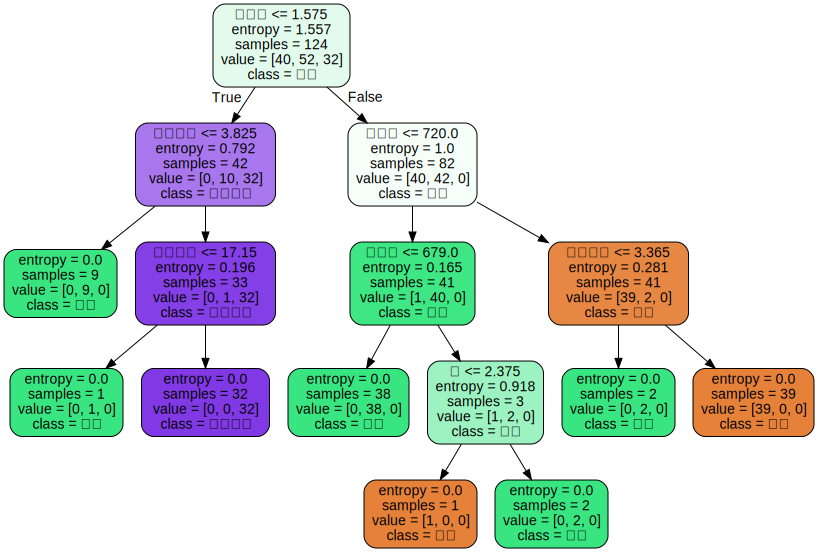

In [58]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

dot_data = tree.export_graphviz(clf,  # 已经训练好的模型
                                feature_names = feature_name,  # 特征的名字
                                class_names=['琴酒','雪梨','贝尔摩德'],
                                filled=True,  # 是否填充颜色 颜色越深 不纯度越高 不同种类的颜色不同
                                rounded=True  #  方框的性质 
)

# 逗号 为什么要卸载参数的前面
# 便于注释最后一行的

graph = graphviz.Source(dot_data)
graph

决策树中没有用到全部的特征

In [59]:
clf.feature_importances_

# 13个特征的重要性

array([0.        , 0.        , 0.01427252, 0.03349391, 0.        ,
       0.        , 0.40305332, 0.        , 0.        , 0.1985386 ,
       0.        , 0.        , 0.35064165])

In [1]:
[*zip(feature_name,clf.feature_importances_)]

# 利用zip 形成元组 ---> 整体是一个list
# 脯氨酸', 0.49400186540086166 的重要性高 ---> 根节点

NameError: name 'feature_name' is not defined

#### 2.1.2 random_state & splitter

- `random_state`用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据
（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。
- `splitter`也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会
优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在
分枝时会更加随机，

选择分数更高的方法即可

 建立多个决策树（随机选取特征） ---> 选取最优的

In [64]:
"""
random_state 设置分支中的随机模型的参数 默认为None
决策树具有随机性 但是低维度的数据中难以体现随机性
"""
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30)
clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)  # 返回预测的准确性
score

0.9814814814814815

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30,splitter="random")
clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) 
score

0.8148148148148148

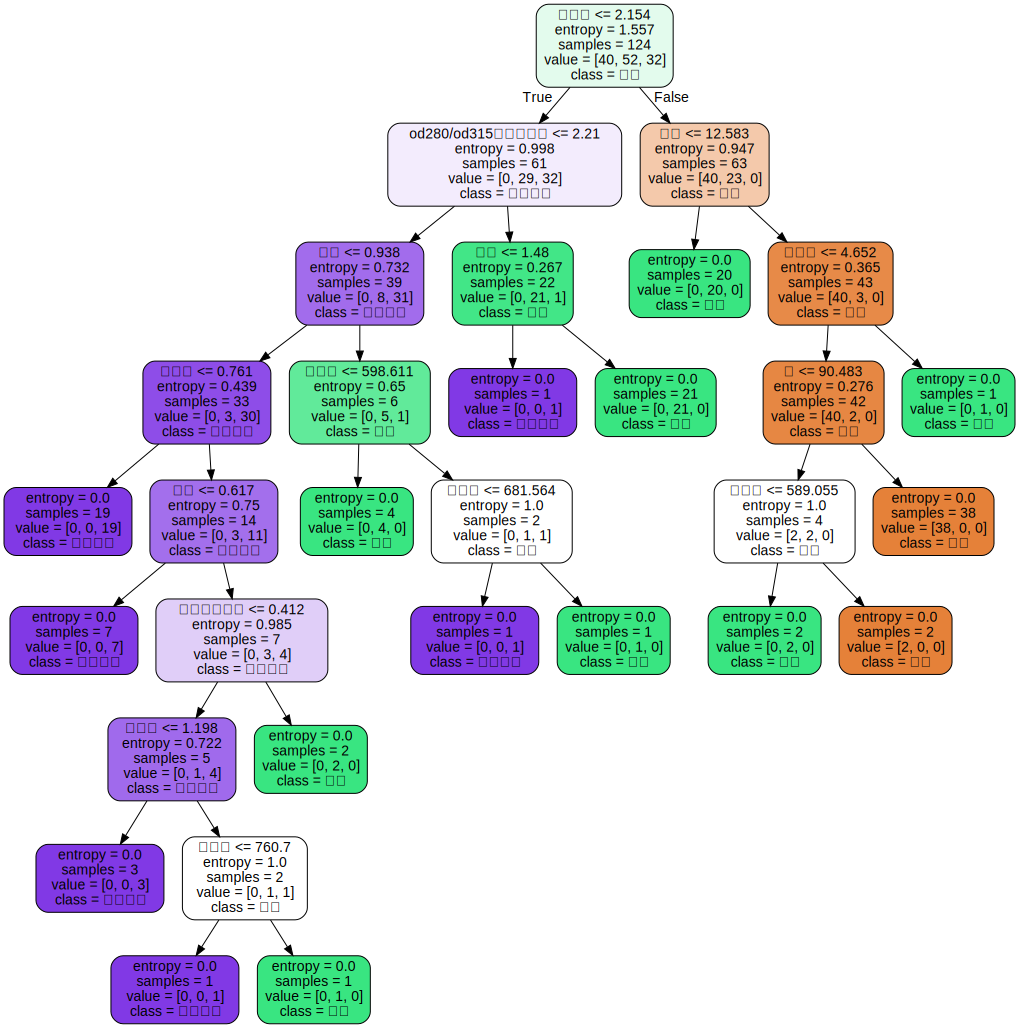

In [69]:
import graphviz 

dot_data = tree.export_graphviz(clf,  # 已经训练好的模型
                                feature_names = feature_name,  # 特征的名字
                                class_names=['琴酒','雪梨','贝尔摩德'],
                                filled=True,  
                                rounded=True  
)

graph = graphviz.Source(dot_data)
graph

决策树明显变宽了，说明随机性增加

In [70]:
# 我们的数对训练集的拟合程度如何?

score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

#### 2.1.3剪枝参数

是否过拟合

- 剪枝
  - `max_depth` 限制树的深度 从 3 开始尝试
  - `min_samples_leaf` 一个节点在分支后至少包含的样本数 与 max_depth 配合使用
  - `min_samples_split` 限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生
  - `max_features` 最大特征数 一般仅在特征数较大时 使用
  - `min_impurity_decrease`限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

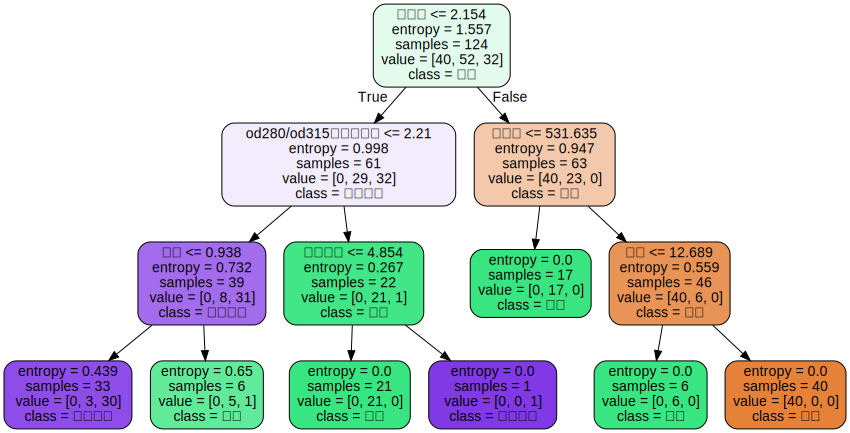

In [77]:
# 实例化 
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3   # 最多三层
                                   # ,min_samples_leaf=10   # 每个分支至少包含10个样本
                                   # ,min_samples_split=10
)
# 注释掉这两个参数以后 score 从0.9 提高到0.94 说明暂时不需要这两个参数


# 训练
clf = clf.fit(Xtrain, Ytrain)

# 画图
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
)

graph = graphviz.Source(dot_data)
graph

In [78]:
score = clf.score(Xtest,Ytest)
score

0.9444444444444444

### 2.2 重要属性和接口 

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是feature_importances_，能
够查看各个特征对模型的重要性

所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。
sklearn不接受任何一维矩阵作为特征矩阵被输入。

**绘制学习曲线**

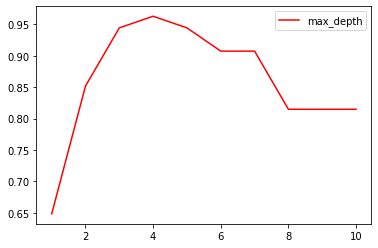

In [81]:
import matplotlib.pyplot as plt
test = []

# 针对决策树的最大深度绘制学习曲线
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    
    test.append(score)


plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

深度为4时 就达到拟合的最好结果

## 3.DecisionTreeRegression

```
class sklearn.tree.DecisionTreeRegressor (criterion=’mse’, splitter=’best’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
```

几乎所有参数，属性及接口都和分类树一模一样。需要注意的是，在回归树种，没有标签分布是否均衡的问题，因
此没有class_weight这样的参数。


### 3.1 重要参数，属性及接口

**criterion**

回归问题 不存在有不纯度的问题

1. 输入`mse`使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为
特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失
2. 输入`friedman_mse`使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差
3. 输入`mae`使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失
属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心。


在回归树中，`MSE`不只是我们的分枝质量衡量指标，也是我们最常用的衡量回归树回归质量的指标，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，MSE越小越好。

然而，回归树的接口score返回的是R平方，并不是MSE。

虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）

**交叉验证**

from sklearn.model_selection import cross_val_score


交叉验证是用来观察模型的稳定性的一种方法，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份
作为训练集，多次计算模型的精确性来评估模型的平均准确程度。

In [1]:
from sklearn.datasets import load_boston

# 回归问题 换了一个数据集

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
regressor = DecisionTreeRegressor(random_state=0)  # 实例化
cross_val_score(regressor,
                boston.data,    # 完整的数据集 不需要划分
                boston.target,  # 完成的表情
                cv=5,          # 做5次交叉验证   默认5次
               # scoring='neg_mean_squared_error'   # 衡量模型的分数 负的均方误差
)



array([ 0.655776  ,  0.61674928,  0.64822751,  0.37931099, -0.97794758])

对于回归问题 默认返回R2 越接近1越好

一般的均方误差非负 MSE 越接近0绝好

#### 3.2 实例：一维回归的图像绘制

用回归数来拟合正弦曲线，并且加入噪声查看的拟合的情况

1.导入需要的库

In [9]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

2.创建一个含有噪声的sin 曲线

在这一步，我们的基本思路是，先创建一组随机的，分布在0~5上的横坐标轴的取值(x)，然后将这一组值放到sin函
数中去生成纵坐标的值(y)，接着再到y上去添加噪声。

- rand()随机生成多少个[0,1]之间的随机数随机数
  - rand(2,3) 生成2行3列的随机数
- 为什么要建立二维数组 不直接生成数 fit()接口中要求数据是二维的 


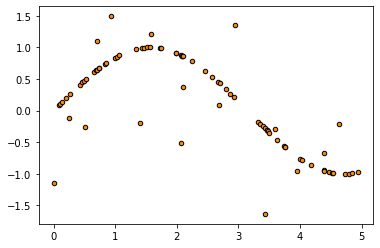

In [19]:
# ————————————生成随机数——————————
rng = np.random.RandomState(1)  #  生成随机数种子  随便输入什么数都可以

# 5 * rng.rand(80,1)    
# rand()随机生成多少个[0,1]之间的随机数随机数  基于上面的随机种子  


X = np.sort( 5 * rng.rand(80,1),axis=0)  # 横轴上进行排序
y = np.sin(X).ravel()   
# ravel() 降维 np.sin(x) 生成的是二维数组 而我们的标签需要是一维的


#——————————对y添加噪声——————————
y[::5] += 3 * (0.5 - rng.rand(16))   # 对y每隔5个数据 一共16个数据进行干扰 
# 3 * [-0.5,0.5] 之间的扰动
y

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

3.实例化&训练模型

In [22]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

4.测试集导入模型，预测结果

- np.arange(start,end,步长)
- newaxis 增加维度 ,类似于reval()的相反

In [25]:
#了解增维切片np.newaxis的用法

l = np.array([1,2,3,4])
l 
l.shape
l[:,np.newaxis]
l[:,np.newaxis].shape  #（1,4）
l[np.newaxis,:].shape  #（4,1）

(1, 4)

In [28]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


5.绘制图像

- dgecolor="black", 散点边框的颜色
- c="darkorange", 散点 填充的颜色
-  label="data" 标签
-  plt.plot() 折线图
   -  color="cornflowerblue", 颜色
   -  label="max_depth=2", 
   -  linewidth=2)  线宽


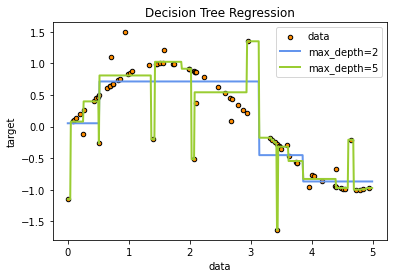

In [30]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()   # 显示图例
plt.show()

最大深度为2时，还算是比较接近
最大深度为5时，更强的拟合 有点过拟合了

可见，回归树学习了近似正弦曲线的局部线性回归。我们可以看到，如果树的最大深度（由max_depth参数控制）
设置得太高，则决策树学习得太精细，它从训练数据中学了很多细节，包括噪声得呈现，从而使模型偏离真实的正
弦曲线，形成过拟合

## 4.实例：泰坦尼克号幸存者的预测

分类树模型来预测一下哪些人可能成为幸存者

1.导入需要的库

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

2.导入数据集

- .info()
- .head() 默认查看前5行

In [34]:
data = pd.read_csv('./DATASETS/data.csv')
data  # 标签不在最后一列 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3.数据预处理

- cabin属性数据确实太多
- drop()
  - inplace=True 立即删除
  - axis =1 删除一列
- .dropna() 
- .fillna() 填充空值 
- astype() 转换为其他类型
- loc(行（特征的名字）,列) 文字索引
- iloc() 利用数字进行索引
  

In [37]:
# ————————————————筛选特征————————————————
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) 
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [40]:
# ————————————————————利用均值填充缺失值————————————————————
data['Age'] = data['Age'].fillna(data['Age'].mean()) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [43]:
#——————————————————删除小部分缺失值所在行——————————————
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [48]:
# ————————————————————将文字分类转换为多分类问题————————————————————
labels = data['Embarked'].unique().tolist()   # 原来是数组现在编程列表
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))
data['Embarked']


0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 889, dtype: int64

In [51]:
#——————————将二分类变量转换为数值型变量——————————
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，
# astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1

data["Sex"] = (data["Sex"]== "male").astype("int")
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


4.提取标签和特征矩阵，分测试集和训练集

In [53]:
X = data.iloc[:,data.columns != 'Survived']  # 所有的行 并且返回为True的类 布尔所用
y = data.iloc[:,data.columns == 'Survived']

In [55]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

In [62]:
#——————————————恢复索引————————————
Xtrain.index  #索引发生了变化
Xtrain.index = range(Xtrain.shape[0])  # 恢复索引


for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index = range(i.shape[0])


In [63]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,70,3,0,26.000000,2,0,8.6625,0
1,703,3,0,18.000000,0,1,14.4542,1
2,457,1,0,65.000000,0,0,26.5500,0
3,74,3,0,26.000000,1,0,14.4542,1
4,569,3,0,29.699118,0,0,7.2292,1
...,...,...,...,...,...,...,...,...
617,508,1,0,29.699118,0,0,26.5500,0
618,249,1,0,37.000000,1,1,52.5542,0
619,711,1,0,24.000000,0,0,49.5042,1
620,422,3,0,21.000000,0,0,7.7333,2


5.导入模型

In [65]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

score

0.599250936329588

In [67]:
# ——————————————使用交叉验证————————————————
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,X,y,cv=10).mean()

score

0.5995020429009192

6.在不同max_depth下观察模型的拟合状况

0.7030260469867211


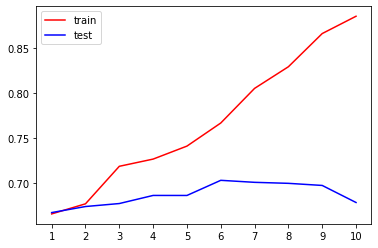

In [73]:
from cProfile import label


tr = []
te = []

for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                criterion='entropy')
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain, Ytrain).mean()
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)

print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()



显然的过拟合

7.用网格搜索调整参数

枚举
- `np.linspace(0,0.5,50)`  # 0-0.5 有顺序排列的50个数
- `arrange(start,end,步长)`   两个都是等差序列
- `GS.best_params_`  从我们输入的参数和参数取值的列表中，返回最佳组合
- `GS.best_score_`  格搜索后的模型评价标准
- 一般很少用5个参数一起搜索，通常都是2个组合 进行调整
- 网格搜索无法舍弃一些参数 可能结果还不如一开始

In [77]:
import numpy as np

gini_threholds = np.linspace(0,0.5,50)  # 0-0.5 有顺序排列的50个数

# entropy_threholds = np.linspace()
# 一串参数和这些参数对应的，我们希望的网格搜索来搜索的参数取值范围

parameters = {'criterion':('gini','entropy'),
            'splitter':('best','random'),
            'max_depth':[*range(1,10)],
            'min_samples_leaf':[*range(1,50,5)],
            'min_impurity_decrease':[*np.linspace(0,0.5,20)]
            }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)

In [78]:
#——————————————网格搜索的重要参数——————————————
GS.best_params_  # 从我们输入的参数和参数取值的列表中，返回最佳组合


{'criterion': 'gini',
 'max_depth': 6,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 21,
 'splitter': 'random'}

In [79]:
GS.best_score_  # 网格搜索后的模型评价标准

0.7122375832053252